###Dataset preparation

This script works with a dataset from the World Values Survey (Wave 7). First, it loads the CSV file into a pandas DataFrame, sets up display options, and even includes a helper function to print the whole DataFrame. It then shows basic stats and lists all the columns. Next, the code checks for missing values by calculating the number and percentage of missing entries for each column, and it creates a summary of these missing values. Based on this summary, it identifies columns with either no missing values or less than 5% missing data.

After that, it cleans the data by removing columns that are either irrelevant or redundant, and then further drops any columns that still have missing values. The script prints the cleaned data and checks again for any missing values, and it also looks at the distribution of the 'B_COUNTRY' column. The cleaned dataset is then saved to a CSV file.

The script goes on to identify and remove columns that have extreme maximum values (for example, any column with a max value greater than 909) and saves this final, filtered dataset to another CSV file. Finally, it uses matplotlib to create a bar plot that shows the distribution of countries in the filtered dataset.

<ipython-input-1-1271e4ed23cc>:5: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('WVS_Cross-National_Wave_7_csv_v6_0.csv')


Basic Descriptive Statistics:
        A_WAVE        A_YEAR  A_STUDY     B_COUNTRY     C_COW_NUM  \
count  97220.0  97220.000000  97220.0  97220.000000  97220.000000   
mean       7.0   2019.132082      2.0    447.872146    476.555153   
std        0.0      1.601004      0.0    256.491312    288.386918   
min        7.0   2017.000000      2.0     20.000000      2.000000   
25%        7.0   2018.000000      2.0    218.000000    201.000000   
50%        7.0   2018.000000      2.0    422.000000    552.000000   
75%        7.0   2020.000000      2.0    688.000000    714.000000   
max        7.0   2023.000000      2.0    909.000000    920.000000   

        D_INTERVIEW          S007     J_INTDATE       FW_START         FW_END  \
count  9.722000e+04  9.722000e+04  9.722000e+04   97220.000000   97220.000000   
mean   4.479431e+08  4.485726e+08  1.905207e+07  201901.606881  201919.989683   
std    2.564912e+08  2.564602e+08  4.658281e+06     160.980181     160.412353   
min    2.007000e+07  2.0

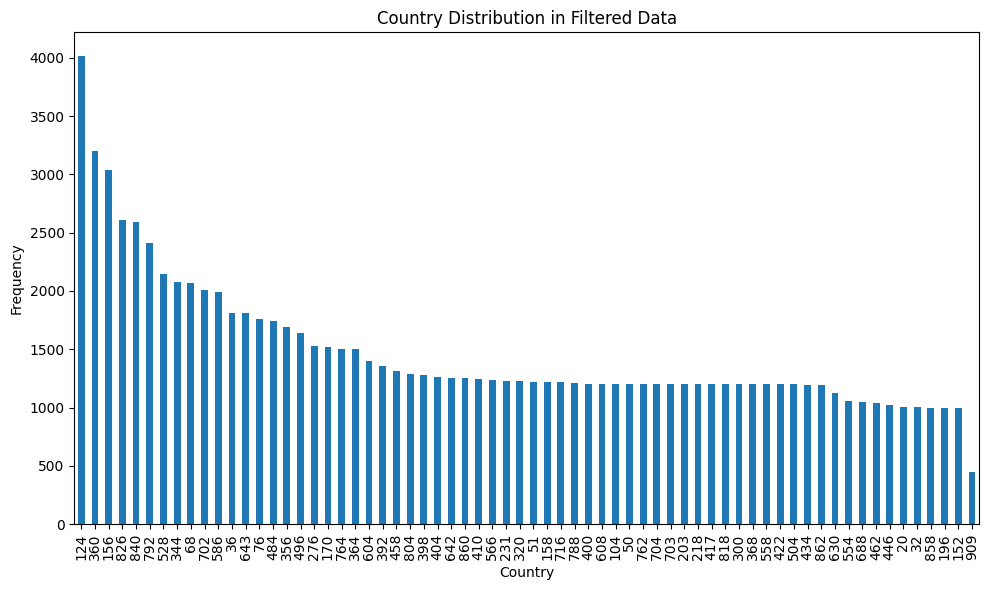

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as display

df = pd.read_csv('WVS_Cross-National_Wave_7_csv_v6_0.csv')
pd.set_option('display.max_rows', 100)

def print_full(df):
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

print("Basic Descriptive Statistics:")
print(df.describe())

print("\nColumns in the DataFrame:")
print(df.columns.tolist())

missing_counts = df.isnull().sum()
missing_percent = missing_counts * 100 / len(df)

missing_summary = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': missing_percent
}).sort_values('percent_missing')

print("\nColumns with No Missing Values:")
print(missing_summary[missing_summary['percent_missing'] == 0])

print("\nColumns with Less Than 5% Missing Values:")
print(missing_summary[missing_summary['percent_missing'] < 5])

cols_with_missing = missing_summary[missing_summary['percent_missing'] > 0]['column_name'].tolist()
print("\nColumns with Missing Values:")
print(cols_with_missing)

columns_to_drop = [
    'version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY_ALPHA',
    'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW', 'S007', 'J_INTDATE', 'FW_START',
    'FW_END', 'K_TIME_START', 'K_TIME_END', 'K_DURATION', 'Q_MODE', 'N_REGION_ISO',
    'N_REGION_WVS', 'N_REGION_NUTS2', 'N_REG_NUTS1', 'G_TOWNSIZE',
    'G_TOWNSIZE2', 'H_SETTLEMENT', 'H_URBRURAL', 'I_PSU',
    'L_INTERVIEWER_NUMBER', 'S_INTLANGUAGE', 'LNGE_ISO',
    'E_RESPINT', 'F_INTPRIVACY', 'E1_LITERACY', 'W_WEIGHT', 'S018', 'PWGHT',
    'S025'
]

filtered_df = df.drop(columns=columns_to_drop, axis=1)
print("\nDataFrame after Dropping Specified Columns:")
print(filtered_df.head())

clean_df = filtered_df.drop(columns=cols_with_missing, axis=1)
print("\nDataFrame after Dropping Columns with Missing Values:")
print(clean_df.head())

total_missing = clean_df.isnull().sum().sum()
print("\nTotal Missing Values in Cleaned DataFrame:", total_missing)

print("\nValue Counts for 'B_COUNTRY':")
print(clean_df['B_COUNTRY'].value_counts())

clean_df.to_csv("filtered.csv", index=False)

max_values = clean_df.describe().loc["max"]
sorted_max = max_values.sort_values(ascending=False)
print("\nSorted Maximum Values from Cleaned DataFrame:")
print(sorted_max)

extreme_columns = sorted_max[sorted_max > 909].index
print("\nColumns with Maximum Values > 909:")
print(extreme_columns)

final_df = clean_df.drop(columns=extreme_columns, axis=1)
print("\nFinal DataFrame after Dropping Extreme Value Columns:")
print(final_df.head())

final_df.to_csv("new_filtered.csv", index=False)

plt.figure(figsize=(10, 6))
final_df['B_COUNTRY'].value_counts().plot(kind='bar')
plt.title("Country Distribution in Filtered Data")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [2]:
final_df.shape

(97220, 371)

This part of the code sets up what counts as a "no answer" by using the codes -4 and -5, and then defines a threshold of 80% (0.8). It goes through each column in the final DataFrame, checks the percentage of responses that are "no answer", and only keeps columns where this percentage is below the threshold. At the end, it prints out the original DataFrame shape, the new shape after filtering, and which columns were dropped.


In [3]:
no_answer_codes = [-4, -5]
threshold = 0.8

cols_to_keep = []
for col in final_df.columns:
    frac_no_answer = final_df[col].isin(no_answer_codes).mean()
    if frac_no_answer < threshold:
        cols_to_keep.append(col)

df_filtered = final_df[cols_to_keep]

print(f"Original shape: {final_df.shape}")
print(f"New shape: {df_filtered.shape}")
print(f"Columns dropped: {set(final_df.columns) - set(cols_to_keep)}")


Original shape: (97220, 371)
New shape: (97220, 321)
Columns dropped: {'Q291UN2', 'Q292M', 'Q82_NAFTA', 'Q291UN4', 'Q291P6', 'Q292O', 'Q292N', 'Q82_ASEAN', 'Q291UN6', 'Q294B', 'Q82_TLC', 'Q292C', 'Q294A', 'Q291G6', 'Q82_ECO', 'Q82_CIS', 'Q82_MERCOSUR', 'Q82_APEC', 'Q291P5', 'Q291G1', 'Q292H', 'Q292L', 'Q82_ARABLEAGUE', 'Q292A', 'Q82_GULFCOOP', 'Q291UN1', 'Q82_OAS', 'Q291G3', 'Q292J', 'Q291G2', 'Q292F', 'Q82_ISLCOOP', 'Q291P1', 'Q82_SCO', 'Q292I', 'Q291G4', 'Q82_CUSMA', 'Q291P4', 'Q293', 'Q292B', 'Q82_AFRICANUNION', 'Q292E', 'Q291P2', 'Q292D', 'Q292G', 'Q291G5', 'Q292K', 'Q82_UNDP', 'Q82_SAARC', 'Q291P3'}


In [4]:
df_filtered.head()

,B_COUNTRY,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q288,Q288R,Q289,Q291UN3,Q291UN5,Y001,Y002,Y003,SECVALWGT,RESEMAVALWGT
0,20,1,1,1,3,1,4,1,1,2,...,5,2,1,-4,-4,1,1,0,0.830,1.0
1,20,1,1,1,4,1,4,1,2,1,...,9,3,1,-4,-4,2,3,-1,0.915,1.0
2,20,1,2,2,2,3,3,2,1,2,...,5,2,1,-4,-4,4,2,2,0.915,1.0
3,20,1,1,1,4,2,4,1,2,2,...,4,2,0,-4,-4,3,2,0,0.830,1.0
4,20,1,1,1,3,1,3,1,2,1,...,4,2,0,-4,-4,2,1,1,0.830,1.0


In [5]:
df_filtered.drop(columns=['Y001', 'Y002', 'Y003', 'SECVALWGT', 'RESEMAVALWGT'], inplace=True)

<ipython-input-5-23cb8f8d21b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Y001', 'Y002', 'Y003', 'SECVALWGT', 'RESEMAVALWGT'], inplace=True)


In [6]:
df_filtered = df_filtered.astype({col: 'float32' for col in df_filtered.select_dtypes('int64').columns})

df_filtered

,B_COUNTRY,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q291UN3,Q291UN5
0,20.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,...,9.0,2.0,2.0,3.0,3.0,5.0,2.0,1.0,-4.0,-4.0
1,20.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,2.0,1.0,...,4.0,2.0,1.0,1.0,2.0,9.0,3.0,1.0,-4.0,-4.0
2,20.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,...,5.0,2.0,1.0,2.0,3.0,5.0,2.0,1.0,-4.0,-4.0
3,20.0,1.0,1.0,1.0,4.0,2.0,4.0,1.0,2.0,2.0,...,9.0,2.0,2.0,2.0,4.0,4.0,2.0,0.0,-4.0,-4.0
4,20.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,...,8.0,2.0,1.0,1.0,4.0,4.0,2.0,0.0,-4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97215,716.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,0.0,-3.0,2.0,2.0,3.0,5.0,2.0,1.0,3.0,3.0
97216,716.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,3.0,1.0,1.0,2.0,5.0,2.0,2.0,5.0,5.0
97217,716.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,0.0,2.0,2.0,2.0,4.0,5.0,2.0,1.0,4.0,2.0
97218,716.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,4.0,2.0


In [7]:
cols = ['X002_02B', 'V002A_01', 'V001A_01']

df_filtered.drop(columns = cols, inplace=True, axis=1)

In [8]:
df_filtered.head()

,B_COUNTRY,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q291UN3,Q291UN5
0,20.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,...,9.0,2.0,2.0,3.0,3.0,5.0,2.0,1.0,-4.0,-4.0
1,20.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,2.0,1.0,...,4.0,2.0,1.0,1.0,2.0,9.0,3.0,1.0,-4.0,-4.0
2,20.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,...,5.0,2.0,1.0,2.0,3.0,5.0,2.0,1.0,-4.0,-4.0
3,20.0,1.0,1.0,1.0,4.0,2.0,4.0,1.0,2.0,2.0,...,9.0,2.0,2.0,2.0,4.0,4.0,2.0,0.0,-4.0,-4.0
4,20.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,...,8.0,2.0,1.0,1.0,4.0,4.0,2.0,0.0,-4.0,-4.0


In [9]:
variable_list = [
    "Q33_3",
    "Q34_3",
    "Q35_3",
    "Q51",
    "Q52",
    "Q53",
    "Q54",
    "Q55",
    "Q56",
    "Q94R",
    "Q95R",
    "Q96R",
    "Q97R",
    "Q98R",
    "Q99R",
    "Q100R",
    "Q101R",
    "Q102R",
    "Q103R",
    "Q104R",
    "Q105R",
    "Q153",
    "Q155",
    "Q157",
    "Q172R",
    "Q255",
    "Q256",
    "Q257",
    "Q258",
    "Q259",
    "X003R2",
    "Q275R",
    "Q291UN5",
    "Q288R",
    "Q283",
    "Q265",
    "V001",
    "Q278",
    "Q278R",
    "Q264",
    "V002",
    "Q277",
    "Q277R",
    "Q276",
    "Q276R",
    "Q280",
    "Q282"
]

new_df = df_filtered.drop(columns=variable_list, inplace=False, axis=1)

new_df.shape


(97220, 266)

###Finding out best hyperparameters for MiniBatchKmeans and Pca

It starts by mounting Google Drive so that you can access your files, and then it imports various libraries like pandas, numpy, matplotlib, seaborn, and several tools from scikit-learn for scaling, reducing dimensions, clustering, and evaluating clusters. A dictionary is defined to match country codes with their actual names, which makes interpreting the results easier.

The code then splits the dataset into two parts: one part for the features (all columns except "B_COUNTRY") and one part for the labels (just the "B_COUNTRY" column), and it converts the labels to float. It also scales the features so that they all have a similar range, which is important for the algorithms to work well.

Next, it creates a folder to save CSV results and starts a grid search to test different numbers of PCA components and clusters. For each combination, the code reduces the data’s dimensions with PCA, applies the MiniBatchKMeans clustering algorithm, and calculates a silhouette score to measure how good the clustering is. The results are saved to a CSV file and printed.

The code also builds a mapping for each country to show how its data points are distributed among the clusters. This mapping is saved as another CSV file. Finally, the code keeps track of the best silhouette score and its corresponding parameters, and prints these out at the end.

Remember, this code runs many different tests and can take a long time to complete. But if you have time you can do it, when **we runned this code we got as the best results pca n_comp=20 and n_clusters=20 for minibatchkmeans.**


In [14]:
train_df = new_df.drop(columns=['B_COUNTRY'], axis=1)
label_df = new_df[['B_COUNTRY']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

country_dict = {
    8: "Albania", 20: "Andorra", 32: "Argentina", 51: "Armenia", 36: "Australia",
    40: "Austria", 31: "Azerbaijan", 50: "Bangladesh", 112: "Belarus", 68: "Bolivia",
    70: "Bosnia Herzegovina", 76: "Brazil", 100: "Bulgaria", 124: "Canada", 152: "Chile",
    156: "China", 170: "Colombia", 191: "Croatia", 196: "Cyprus", 203: "Czechia",
    208: "Denmark", 218: "Ecuador", 818: "Egypt", 233: "Estonia", 231: "Ethiopia",
    246: "Finland", 250: "France", 268: "Georgia", 276: "Germany", 826: "Great Britain",
    300: "Greece", 320: "Guatemala", 344: "Hong Kong SAR", 348: "Hungary", 352: "Iceland",
    356: "India", 360: "Indonesia", 364: "Iran", 368: "Iraq", 380: "Italy",
    392: "Japan", 400: "Jordan", 398: "Kazakhstan", 404: "Kenya", 417: "Kyrgyzstan",
    428: "Latvia", 422: "Lebanon", 434: "Libya", 440: "Lithuania", 446: "Macao SAR",
    458: "Malaysia", 462: "Maldives", 484: "Mexico", 496: "Mongolia", 499: "Montenegro",
    504: "Morocco", 104: "Myanmar", 528: "Netherlands", 554: "New Zealand", 558: "Nicaragua",
    566: "Nigeria", 807: "North Macedonia", 909: "Northern Ireland", 578: "Norway",
    586: "Pakistan", 604: "Peru", 608: "Philippines", 616: "Poland", 620: "Portugal",
    630: "Puerto Rico", 642: "Romania", 643: "Russia", 688: "Serbia", 702: "Singapore",
    703: "Slovakia", 705: "Slovenia", 410: "South Korea", 724: "Spain", 752: "Sweden",
    756: "Switzerland", 158: "Taiwan ROC", 762: "Tajikistan", 764: "Thailand", 788: "Tunisia",
    792: "Turkey", 804: "Ukraine", 840: "United States", 858: "Uruguay", 860: "Uzbekistan",
    862: "Venezuela", 704: "Vietnam", 716: "Zimbabwe"
}

label_df["B_COUNTRY"] = label_df["B_COUNTRY"].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)

results_folder = "/content/drive/My Drive/csv_results"
os.makedirs(results_folder, exist_ok=True)

csv_results_filepath = os.path.join(results_folder, "grid_search_results.csv")
with open(csv_results_filepath, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["n_components", "n_clusters", "silhouette_score"])
    writer.writeheader()

pca_components = [10, 20, 40, 50, 75, 100, 150]
cluster_values = [10, 15, 20]

best_score = -1
best_params = {}
best_labels = None
best_X_reduced = None

for n_components in pca_components:
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X_scaled)

    for n_clusters in cluster_values:
        kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)
        labels = kmeans.fit_predict(X_reduced)

        if len(set(labels)) > 1:
            score = silhouette_score(X_reduced, labels)
        else:
            score = np.nan

        result_row = {
            "n_components": n_components,
            "n_clusters": n_clusters,
            "silhouette_score": score
        }
        with open(csv_results_filepath, mode="a", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=["n_components", "n_clusters", "silhouette_score"])
            writer.writerow(result_row)

        print(f"PCA components: {n_components}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

        country_cluster_mapping = {}
        unique_countries = label_df["B_COUNTRY"].unique()
        for country_code in unique_countries:
            country_indices = label_df[label_df["B_COUNTRY"] == country_code].index
            if len(country_indices) > 0:
                country_clusters = labels[country_indices]
                unique, counts = np.unique(country_clusters, return_counts=True)
                cluster_counts = dict(zip(unique, counts))
                country_cluster_mapping[country_code] = cluster_counts

        cluster_df = pd.DataFrame.from_dict(country_cluster_mapping, orient="index").fillna(0).astype(int)
        cluster_df.index = cluster_df.index.map(lambda x: country_dict.get(int(x), f"Unknown-{int(x)}"))
        csv_mapping_filepath = os.path.join(results_folder, f"country_cluster_mapping_pca{n_components}_clusters{n_clusters}.csv")
        cluster_df.to_csv(csv_mapping_filepath)
        print(f"✅ Mapping saved to '{csv_mapping_filepath}'")

        if not np.isnan(score) and score > best_score:
            best_score = score
            best_params = {"n_components": n_components, "n_clusters": n_clusters}
            best_labels = labels
            best_X_reduced = X_reduced

print("\nBest Silhouette Score:", best_score)
print("Best Parameters:", best_params)


### Running with the best hyerparameters

From the previous cell we found the best parameters n_comp=20, n_cluster=20

In [15]:
train_df = new_df.drop(columns=['B_COUNTRY'], axis=1)
label_df = new_df[['B_COUNTRY']]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import numpy as np


#applying (x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)

#pipeline is PCA -> MiniBatchKMeans
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X_scaled)
kmeans = MiniBatchKMeans(n_clusters=20, batch_size=100, random_state=42)
labels = kmeans.fit_predict(X_reduced)

country_cluster_mapping = {}
unique_countries = label_df["B_COUNTRY"].unique()
for country_code in unique_countries:
    country_indices = label_df[label_df["B_COUNTRY"] == country_code].index
    print(country_indices)
    if len(country_indices) > 0:
        country_clusters = labels[country_indices]
        unique, counts = np.unique(country_clusters, return_counts=True)
        cluster_counts = dict(zip(unique, counts))
        country_cluster_mapping[country_code] = cluster_counts

cluster_df = pd.DataFrame.from_dict(country_cluster_mapping, orient="index").fillna(0).astype(int)
cluster_df.index = cluster_df.index.map(lambda x: country_dict.get(int(x), f"Unknown-{int(x)}"))
csv_mapping_filepath = "best_minibatch_kmeans.csv"
cluster_df.to_csv(csv_mapping_filepath)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
        994,  995,  996,  997,  998,  999, 1000, 1001, 1002, 1003],
      dtype='int64', length=1004)
Index([1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
       ...
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006],
      dtype='int64', length=1003)
Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       ...
       3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229],
      dtype='int64', length=1223)
Index([3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239,
       ...
       5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042],
      dtype='int64', length=1813)
Index([5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052,
       ...
       6233, 6234, 6235, 6236, 6237, 6238, 6239, 6240, 6241, 6242],
      dtype='int64', length=1200)
Index([6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252,
       ...
       8300, 8301, 830

Сode focuses on visualizing data for Kazakhstan, which is represented by the country code 398. It starts by finding all the rows in the label DataFrame where "B_COUNTRY" equals 398. If there are no data points for this code, it prints a message saying so. If there are, the code calculates the distribution of clusters among these data points and identifies the most common cluster.

Next, the code uses PCA to reduce the feature data to two dimensions, making it possible to create a 2D scatter plot. It then plots all the data points using a light color scheme to show their cluster assignments and overlays the points for Kazakhstan in red with black edges. The plot includes a title, axis labels, and a legend, making it easy to see where Kazakhstan's data points fall in relation to the rest of the dataset.

Cluster distribution for label 398.0:
Cluster 0: 12 samples
Cluster 1: 124 samples
Cluster 4: 38 samples
Cluster 5: 176 samples
Cluster 6: 80 samples
Cluster 7: 346 samples
Cluster 9: 86 samples
Cluster 10: 77 samples
Cluster 12: 92 samples
Cluster 13: 31 samples
Cluster 14: 8 samples
Cluster 16: 148 samples
Cluster 18: 58 samples

Most frequent cluster for label 398.0: 7


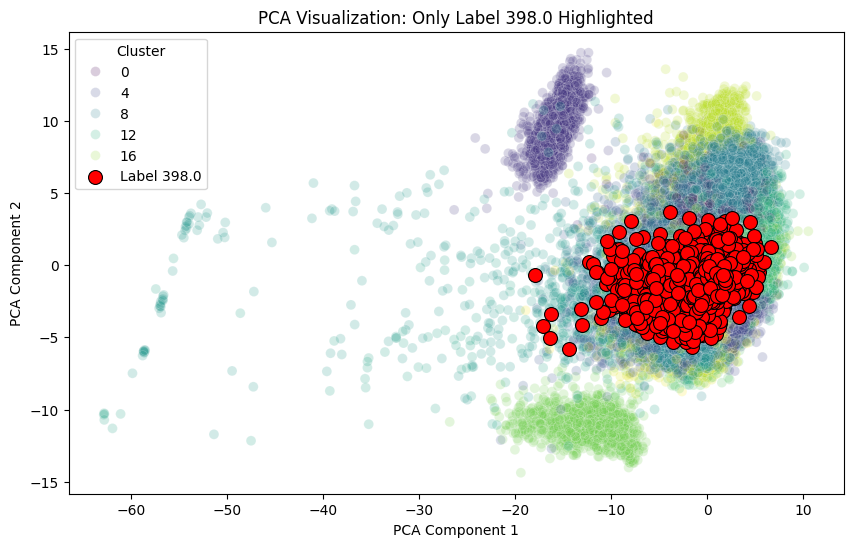

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

highlight_indices = label_df[label_df["B_COUNTRY"] == 398.0].index

if len(highlight_indices) == 0:
    print("No data points found for B_COUNTRY = 398.0")
else:
    clusters_398 = labels[highlight_indices]

    unique, counts = np.unique(clusters_398, return_counts=True)
    cluster_counts = dict(zip(unique, counts))

    majority_cluster = max(cluster_counts, key=cluster_counts.get)

    print("Cluster distribution for label 398.0:")
    for cluster_id, count in cluster_counts.items():
        print(f"Cluster {cluster_id}: {count} samples")
    print(f"\nMost frequent cluster for label 398.0: {majority_cluster}")

    pca = PCA(n_components=2)
    train_pca = pca.fit_transform(X_scaled)

    pca_398 = train_pca[highlight_indices]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1],
                    hue=labels, palette="viridis", alpha=0.2, s=50)
    sns.scatterplot(x=pca_398[:, 0], y=pca_398[:, 1],
                    color="red", edgecolor="black", s=100, label="Label 398.0")
    plt.title("PCA Visualization: Only Label 398.0 Highlighted")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()


In [18]:
# Add the cluster labels to train_df
train_df['Cluster'] = labels
train_df

<ipython-input-18-63ab54cab57c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['Cluster'] = labels


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q279,Q281,Q284,Q285,Q286,Q287,Q288,Q289,Q291UN3,Cluster
0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,1.0,...,1.0,4.0,2.0,2.0,3.0,3.0,5.0,1.0,-4.0,7
1,1.0,1.0,1.0,4.0,1.0,4.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,2.0,9.0,1.0,-4.0,0
2,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,...,1.0,5.0,2.0,1.0,2.0,3.0,5.0,1.0,-4.0,0
3,1.0,1.0,1.0,4.0,2.0,4.0,1.0,2.0,2.0,1.0,...,1.0,4.0,2.0,2.0,2.0,4.0,4.0,0.0,-4.0,0
4,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,1.0,...,1.0,4.0,2.0,1.0,1.0,4.0,4.0,0.0,-4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97215,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,...,7.0,0.0,-3.0,2.0,2.0,3.0,5.0,1.0,3.0,5
97216,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,1.0,3.0,1.0,1.0,2.0,5.0,2.0,5.0,1
97217,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,7.0,0.0,2.0,2.0,2.0,4.0,5.0,1.0,4.0,9
97218,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,3.0,9.0,2.0,1.0,2.0,4.0,1.0,1.0,4.0,4
